In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import tensorflow as tf
# from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD





2022-12-02 14:29:45.437645: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Import digits data set

In [374]:
from sklearn.model_selection import train_test_split
import random

digits = datasets.load_digits()
X = digits.images
y = digits.target

train_sample_size = 600
sample_size = round(train_sample_size/0.8)+100

test_s = 100/(sample_size)

X = X[0:sample_size]
y = y[0:sample_size]

# If you want full data set
X = digits.images
y = digits.target
test_s = 100/len(X)

# Divide into test and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_s, random_state=31) #  shuffle=False random_state=42






X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=22) #  shuffle=False random_state=42

# Normalizing the data between 0-1 instead of 0-16
X_train = X_train[:,:,:,np.newaxis]/16.
X_val = X_val[:,:,:,np.newaxis]/16.
X_test = X_test[:,:,:,np.newaxis]/16.


y_train = y_train[:,np.newaxis]
y_val = y_val[:,np.newaxis]
y_test = y_test[:,np.newaxis]



Visualize the images

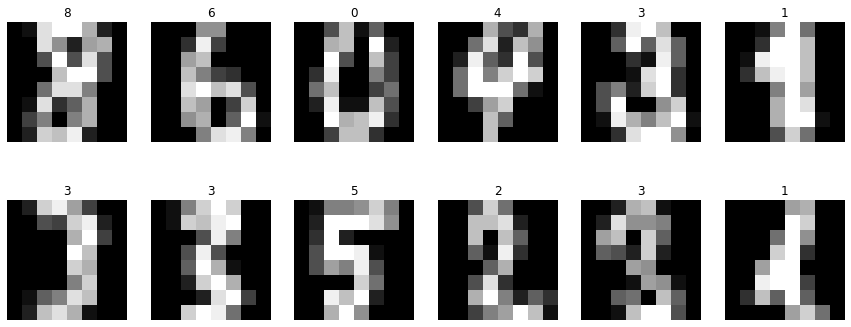

In [273]:
plt.figure(figsize=(15,6))
for i in range(12):
    plt.subplot(2,6,i+1)
    plt.imshow(X_train[i].reshape((8,8)),cmap = "gray")
    plt.title(y_train[i,0])
    plt.axis('off')

Setup for one convolution layer 

In [349]:
inputs = Input(shape = (8,8,1))

conv_1 = Conv2D(filters = 8, padding='same',kernel_size = 3, strides = (1,1),activation = 'relu')(inputs)
mp_1 = MaxPool2D(pool_size= 2)(conv_1)

fl = Flatten()(mp_1)
outputs = Dense(10, activation = 'softmax')(fl)

model = Model(inputs, outputs,name = "dense_single_layer")
opt = Adam()
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Setup for two convolution layers

In [401]:
inputs = Input(shape = (8,8,1))

conv_1 = Conv2D(filters = 64, padding='same',kernel_size = 3, strides = (1,1),activation = 'relu')(inputs)
# dr_1 = Dropout(0.1)(conv_1)
# mp_1 = MaxPool2D(pool_size= 2)(dr_1)
mp_1 = MaxPool2D(pool_size= 2)(conv_1)


conv_2 = Conv2D(filters = 8, padding='same',kernel_size = 3, strides = (1,1),activation = 'relu')(mp_1)
# dr_2 = Dropout(0.1)(conv_2)
# mp_2 = MaxPool2D(pool_size= 2)(dr_2)
mp_2 = MaxPool2D(pool_size= 2)(conv_2)


fl = Flatten()(mp_2)
outputs = Dense(10, activation = 'softmax')(fl)

model = Model(inputs, outputs,name = "dense_double_layer")

opt = Adam()
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [402]:
model.summary()

Model: "dense_double_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_53 (InputLayer)       [(None, 8, 8, 1)]         0         
                                                                 
 conv2d_90 (Conv2D)          (None, 8, 8, 64)          640       
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_91 (Conv2D)          (None, 4, 4, 8)           4616      
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 2, 2, 8)          0         
 g2D)                                                            
                                                                 
 flatten_52 (Flatten)        (None, 32)         

In [403]:
training_hist = model.fit(X_train, y_train, batch_size = 24, epochs = 30, validation_data=(X_val,y_val))

Epoch 1/30
57/57 [==============================] - 3s 13ms/step - loss: 2.2022 - accuracy: 0.3080 - val_loss: 2.0663 - val_accuracy: 0.5324
Epoch 2/30
57/57 [==============================] - 0s 7ms/step - loss: 1.7588 - accuracy: 0.7281 - val_loss: 1.4094 - val_accuracy: 0.7412
Epoch 3/30
57/57 [==============================] - 0s 6ms/step - loss: 1.0303 - accuracy: 0.8128 - val_loss: 0.7787 - val_accuracy: 0.8206
Epoch 4/30
57/57 [==============================] - 0s 6ms/step - loss: 0.5677 - accuracy: 0.8946 - val_loss: 0.4764 - val_accuracy: 0.8853
Epoch 5/30
57/57 [==============================] - 0s 6ms/step - loss: 0.3780 - accuracy: 0.9211 - val_loss: 0.3500 - val_accuracy: 0.9294
Epoch 6/30
57/57 [==============================] - 0s 6ms/step - loss: 0.2775 - accuracy: 0.9396 - val_loss: 0.2903 - val_accuracy: 0.9176
Epoch 7/30
57/57 [==============================] - 0s 6ms/step - loss: 0.2247 - accuracy: 0.9477 - val_loss: 0.2407 - val_accuracy: 0.9294
Epoch 8/30
57/57 [=

Save the model chosen above

In [404]:
y_pred = model.evaluate(X_test,y_test,verbose=2)
print(round(training_hist.history['accuracy'][-1],3))
print(round(training_hist.history['val_accuracy'][-1],3))

4/4 - 0s - loss: 0.0409 - accuracy: 0.9900 - 86ms/epoch - 21ms/step
0.996
0.976


In [127]:

tf.keras.models.save_model(model,'models/cnn_one_layer.h5')

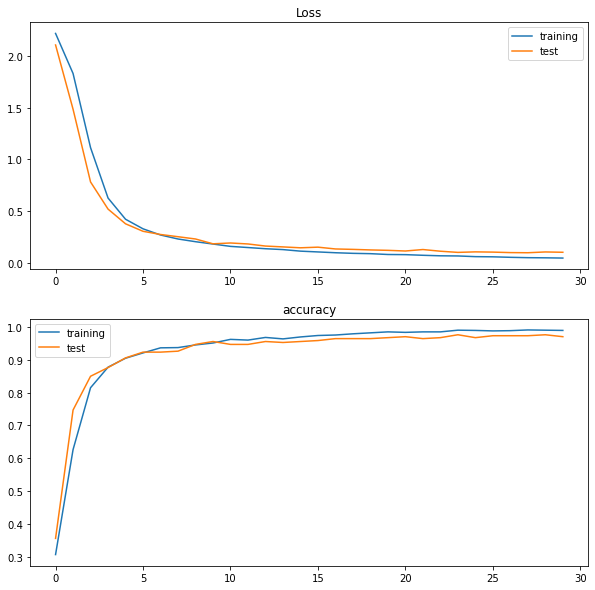

In [384]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(training_hist.history['loss'])
plt.plot(training_hist.history['val_loss'])
plt.title('Loss')
plt.legend(['training','test'])
plt.subplot(2,1,2)
plt.plot(training_hist.history['accuracy'])
plt.plot(training_hist.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['training','test'])

In [ ]:
model_loaded = tf.keras.models.load_model('models/cnn_two_layer.h5')

Plot some examples with their prediction

1/1 [==============================] - 0s 51ms/step


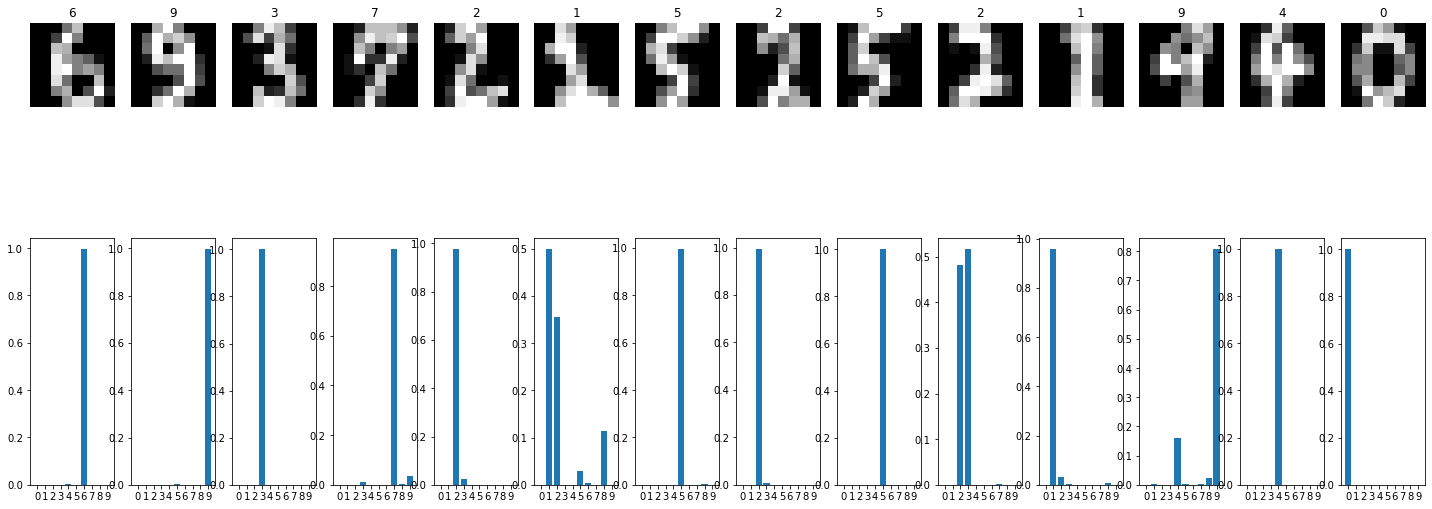

In [116]:
n_examples = 14
y_pred = model_loaded.predict(X_val[0:n_examples])
plt.figure(figsize= (25,10))
for i in range(n_examples):
    plt.subplot(2,n_examples,i+1)
    plt.imshow(X_val[i].reshape((8,8)),cmap='gray')
    plt.title(y_val[i,0])
    plt.axis('off')
    plt.subplot(2,n_examples,i+n_examples+1)
    plt.bar(["0","1","2","3","4","5","6","7","8","9"],y_pred[i])